# Plotting and typesetting

The following are functions for plotting and typesetting.

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
font = {'size': 12}
plt.rc('font', **font)

In [136]:
# Function for creating a surface plot.
def plot3d(f,lim=(-5,5),title='Surface plot',detail=0.05,
           xlabel='X',ylabel='Y',zlabel='Z',angle=0,line=[]):
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    if angle != 0:
        ax.view_init(30, angle)
    xs = ys = np.arange(lim[0],lim[1], detail)
    X, Y = np.meshgrid(xs, ys)
    zs = np.array([f(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    surf = ax.plot_surface(X, Y, Z, cmap=cm.RdYlGn)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel);ax.set_zlabel(zlabel)
    if len(line) > 0:
        plt.plot(line[0], line[1], [f(x,y) for x, y in zip(line[0], line[1])], 
                 c='r', lw='2', zorder=3)
    plt.title(title)
    plt.show()

In [137]:
# Function to create a contour plot.
def plot_contour(f,lim=(-5,5),title='Contour plot',detail=0.05,
                 xlabel='X',ylabel='Y'):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    xs = ys = np.arange(lim[0],lim[1], detail)
    X, Y = np.meshgrid(xs, ys)
    zs = np.array([f(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    CS = ax.contourf(X,Y,Z,16, cmap=cm.RdYlGn)
    #plt.clabel(CS, fontsize=9, inline=1)
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    return ax

# Problem

In this problem we want to find an optimum between the amount of operators and the time that they operate. The operators have a certain productivity at each point in time, which is low at the beginning, then reaches a maximum, and then diminishes.

Each operator has an hourly cost of $\$30$, and produces $3$ units at his maximum efficiency. The sales price per unit is $\$25$.

The operators have a productivity curve that is described with the following function:

$$ p(t) = \dfrac{1}{1.2 + \frac{1}{2}\left(x-2\right)^2} $$

In [16]:
p = lambda t: 1 / (1.2 + 0.5 * (t - 2)**2)

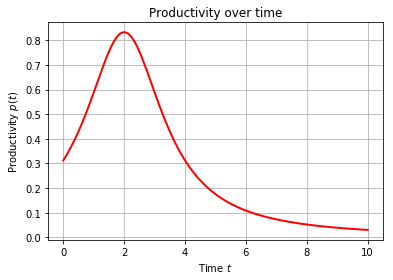

In [60]:
x = np.linspace(0, 10, 128)
y = E(x)
plot(x, y, lw=2, c='r')
grid()
title('Productivity over time')
ylabel('Productivity $p(t)$')
xlabel('Time $t$');

## Problem statement

In order to maximize the profit, how many hours should each operator work, and how many operators do we need?

# Model

Let an operator be denoted with $w$, the hourly cost with $c$, the produced units at maximum efficiency $u$, and the sales price per unit $s$.

## Cumulative productivity

The total realized productivity for a person at time $t$, is the area under the curve of $p(t)$ from $0$ to $t$. To make this easier, we will create a cumulative function $P(t)$. This is achieved by integrating $p(t)$, which gives:

$$ P(t) = \int_0^t \dfrac{1}{1.2 + 0.5 (t - 2)^2} \approx -1.29 \tan^{-1}(1.29 - 0.64t) + 1.175.$$

In [30]:
P = lambda t: -1.29 * np.arctan(1.29 - 0.64*t) + 1.175

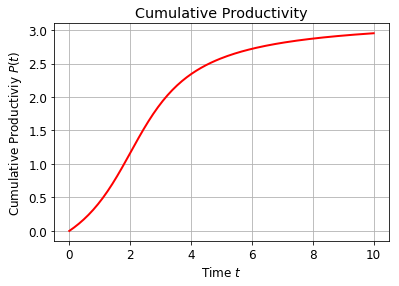

In [114]:
x = np.linspace(0, 10, 128)
y = P(x)
plot(x, y, lw=2, c='r')
grid()
title('Cumulative Productivity')
ylabel('Cumulative Productiviy $P(t)$')
xlabel('Time $t$');

## Total revenue

The total revenue $R$ consists of how many operators have been working, how long they have been working, and the total units produced at peak efficiency, all while taking the productivity curve into account. To calculate the total revenue, we get:

$$ R(w,t) = usw\cdot P(t)$$

We know that $s=25$ and $u=3$, substiting gives us $R(w,t) = 75w \cdot P(t)$. Which means that one operator will generate $\$75$ revenue per unit of time $t$ if his efficiency is $100\%$. If we multiply this by all the operators $w$, we get the total generated revenue for $w$ operators working for $t$ time.

## Total cost

The total cost is the number of operators multiplied by their cost per unit of time, and the time they have been working. This gives us:

$$ C(w,t) = cwt $$

We know that $c=25$, substituting gives us $C(w,t)=25wt$.

## Profit function

The profit $T$ is found with $T=R-C$. This means that:

$$ T(w,t) = R(w,t) - C(w,t)$$

If we now substitute in all of the functions we will get the profit function:

$$ T(w,t) = 75w \cdot (-1.29 \tan^{-1}(1.29 - 0.64t) + 1.175) - 25wt.$$

In [46]:
T = lambda w,t: 75 * w * (-1.29*arctan(1.29 - 0.64 * t) + 1.175) - 25*w*t

# Analysis

Excellent, we now have a function of two variables. If we create a surface plot of $T$, we can see how it relates $w$ and $t$.

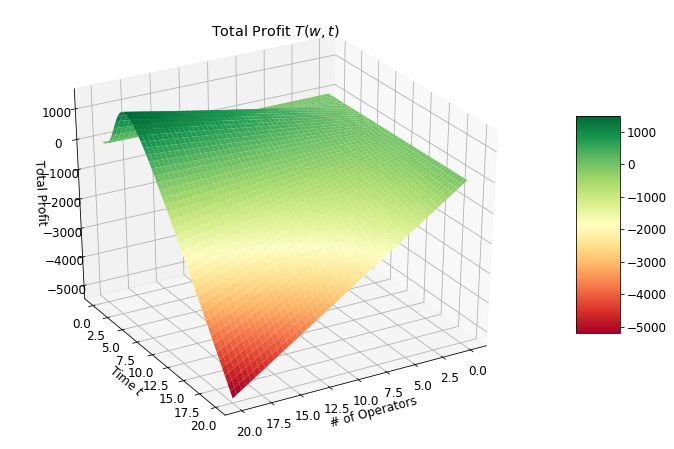

In [66]:
plot3d(T, lim=(0, 20), 
       title='Total Profit $T(w,t)$', 
       xlabel='# of Operators', 
       ylabel='Time $t$', 
       zlabel='Total Profit',
       angle=60)

If we look at the contour plot, it becomes clear that an operator yields a maximum profit at a certian point $t$. As more operators are added, the profit change linearly.

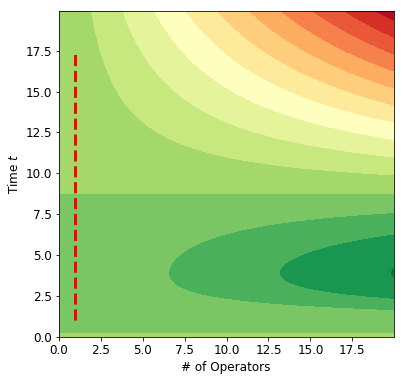

In [148]:
plot_contour(T, lim=(0,20), xlabel='# of Operators', ylabel='Time $t$', 
             title='Contour plot of $T(w,t)$');
plot((1,1), (1,17.5), c='r', lw=3, ls='dashed')

We want to cut the function parallel to the time axis, as shown in the contour map above (red line). To do this, we will evaluate the function $T(1,t)$, which gives us:

$$ T(1,t) = T(t) = 75(-1.29\tan^{-1}(1.29-0.64t)+1.175)-30t $$

The result is a function of one variable, which is easy to optimize:

In [149]:
T1 = lambda t: 75*(-1.29*arctan(1.29 - 0.64*t)+1.175) - 30*t

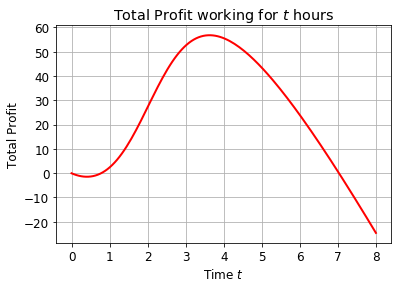

In [150]:
x = np.linspace(0, 8, 128)
y = T1(x)
plot(x,y, lw=2, c='r')
grid()
title('Total Profit working for $t$ hours')
ylabel('Total Profit')
xlabel('Time $t$');

To get the idea, this graph is a cross section of the 3D plot, which can be visualized:

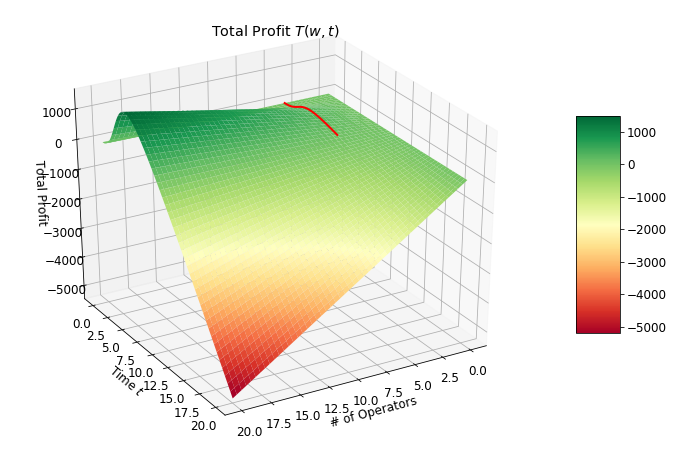

In [135]:
plot3d(T, lim=(0, 20), 
       title='Total Profit $T(w,t)$', 
       xlabel='# of Operators', 
       ylabel='Time $t$', 
       zlabel='Total Profit',
       angle=60,
       line=[ [4] * 24, np.linspace(0,8,24)] )

To find the optimal value of $t$, we find $\dfrac{d 𝑇(1,𝑡)}{dt} = 0$. Differentiating $T(t)$ gives $\dfrac{61.92}{(1.29-0.64t)^2+1}-30$ which means that $t \approx 3.62745$.

# Conclusion

The profit is maximized when the operators work for $3.62$ hours. When more operators are added, the profit increases linearly. 

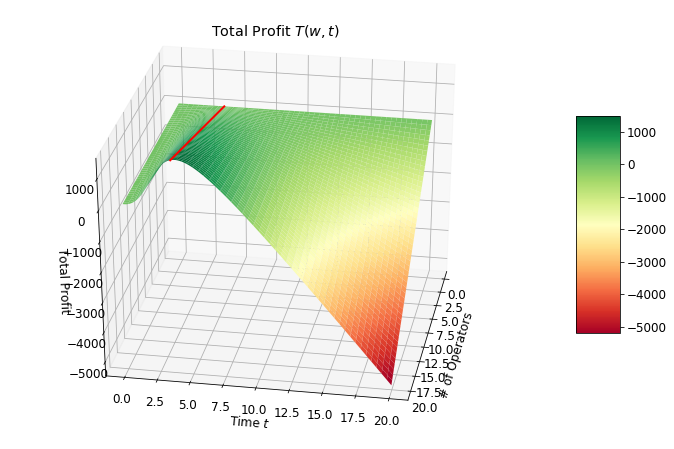

In [146]:
plot3d(T, lim=(0, 20), 
       title='Total Profit $T(w,t)$', 
       xlabel='# of Operators', 
       ylabel='Time $t$', 
       zlabel='Total Profit',
       angle=10,
       line=[ np.linspace(0,20,24), [3.62]*24] )